# Project HR

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as ply
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv("data/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.shape

(1470, 35)

In [5]:
df.pop('EmployeeCount')
df.pop('EmployeeNumber')
df.pop('Over18')
df.pop('StandardHours')

0       80
1       80
2       80
3       80
4       80
5       80
6       80
7       80
8       80
9       80
10      80
11      80
12      80
13      80
14      80
15      80
16      80
17      80
18      80
19      80
20      80
21      80
22      80
23      80
24      80
25      80
26      80
27      80
28      80
29      80
        ..
1440    80
1441    80
1442    80
1443    80
1444    80
1445    80
1446    80
1447    80
1448    80
1449    80
1450    80
1451    80
1452    80
1453    80
1454    80
1455    80
1456    80
1457    80
1458    80
1459    80
1460    80
1461    80
1462    80
1463    80
1464    80
1465    80
1466    80
1467    80
1468    80
1469    80
Name: StandardHours, Length: 1470, dtype: int64

In [6]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [7]:
df.shape

(1470, 31)

In [8]:
y = df['Attrition']
X = df
X.pop('Attrition')

0       Yes
1        No
2       Yes
3        No
4        No
5        No
6        No
7        No
8        No
9        No
10       No
11       No
12       No
13       No
14      Yes
15       No
16       No
17       No
18       No
19       No
20       No
21      Yes
22       No
23       No
24      Yes
25       No
26      Yes
27       No
28       No
29       No
       ... 
1440     No
1441     No
1442    Yes
1443     No
1444    Yes
1445     No
1446     No
1447     No
1448     No
1449     No
1450     No
1451     No
1452    Yes
1453     No
1454     No
1455     No
1456     No
1457     No
1458     No
1459     No
1460     No
1461    Yes
1462     No
1463     No
1464     No
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object

In [9]:
y.unique()

array(['Yes', 'No'], dtype=object)

In [10]:
from sklearn import preprocessing
le = preprocessing.LabelBinarizer()
y = le.fit_transform(y)

In [11]:
y.shape

(1470, 1)

In [12]:
y

array([[1],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
Age                         1470 non-null int64
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome               1470 non-null int64
MonthlyRate                 1470 non-null int64
NumCompaniesWorked          1470 non-null int64
OverTime               

In [14]:
df.select_dtypes(['object']).head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No


In [15]:
ind_BusinessTravel = pd.get_dummies(df['BusinessTravel'], prefix='BusinessTravel')
ind_Department = pd.get_dummies(df['Department'], prefix='Department')
ind_EducationField = pd.get_dummies(df['EducationField'], prefix='EducationField')
ind_Gender = pd.get_dummies(df['Gender'], prefix='Gender')
ind_JobRole = pd.get_dummies(df['JobRole'], prefix='JobRole')
ind_MaritalStatus = pd.get_dummies(df['MaritalStatus'], prefix='MaritalStatus')
ind_OverTime = pd.get_dummies(df['OverTime'], prefix='OverTime')

In [16]:
ind_BusinessTravel.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely
0,0,0,1
1,0,1,0
2,0,0,1
3,0,1,0
4,0,0,1


In [17]:
df1 = pd.concat([ind_BusinessTravel, ind_Department, 
                 ind_EducationField, ind_Gender, 
                 ind_JobRole, ind_MaritalStatus, 
                 ind_OverTime, df.select_dtypes(['int64'])], axis=1)

In [18]:
df1.shape

(1470, 51)

***

# Decision Tree

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1, y)

In [20]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

In [21]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [22]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [23]:
accuracy_score(y_train, clf.predict(X_train))

1.0

In [24]:
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       923
           1       1.00      1.00      1.00       179

   micro avg       1.00      1.00      1.00      1102
   macro avg       1.00      1.00      1.00      1102
weighted avg       1.00      1.00      1.00      1102



In [25]:
confusion_matrix(y_train, clf.predict(X_train))

array([[923,   0],
       [  0, 179]], dtype=int64)

In [26]:
accuracy_score(y_test, clf.predict(X_test))

0.7527173913043478

In [27]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       310
           1       0.25      0.28      0.26        58

   micro avg       0.75      0.75      0.75       368
   macro avg       0.55      0.56      0.56       368
weighted avg       0.76      0.75      0.76       368



In [28]:
confusion_matrix(y_test, clf.predict(X_test))

array([[261,  49],
       [ 42,  16]], dtype=int64)

In [29]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [30]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        print("Train Results:\n")
        print("Accuracy Score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {} \n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {} \n".format(confusion_matrix(y_train, clf.predict(X_train))))
        
        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        print("Test Results:\n")
        print("Accuracy Score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {} \n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {} \n".format(confusion_matrix(y_test, clf.predict(X_test))))

In [31]:
print_score(clf, X_train, y_train, X_test, y_test, train=True)

Train Results:

Accuracy Score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       923
           1       1.00      1.00      1.00       179

   micro avg       1.00      1.00      1.00      1102
   macro avg       1.00      1.00      1.00      1102
weighted avg       1.00      1.00      1.00      1102
 

Confusion Matrix: 
 [[923   0]
 [  0 179]] 

Average Accuracy: 	 0.7632
Accuracy SD: 		 0.0410


In [32]:
print_score(clf, X_train, y_train, X_test, y_test, train=False)

Test Results:

Accuracy Score: 0.7527

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.84      0.85       310
           1       0.25      0.28      0.26        58

   micro avg       0.75      0.75      0.75       368
   macro avg       0.55      0.56      0.56       368
weighted avg       0.76      0.75      0.76       368
 

Confusion Matrix: 
 [[261  49]
 [ 42  16]] 



***

## Bagging

In [33]:
from sklearn.ensemble import BaggingClassifier

In [34]:
bag_clf = BaggingClassifier(base_estimator=clf, n_estimators=5000,
                           bootstrap=True, n_jobs=-1,
                           random_state=42)

In [35]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=5000, n_jobs=-1, oob_score=False,
         random_state=42, verbose=0, warm_start=False)

In [36]:
print_score(bag_clf, X_train, y_train, X_test, y_test, train=True)

Train Results:

Accuracy Score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       923
           1       1.00      1.00      1.00       179

   micro avg       1.00      1.00      1.00      1102
   macro avg       1.00      1.00      1.00      1102
weighted avg       1.00      1.00      1.00      1102
 

Confusion Matrix: 
 [[923   0]
 [  0 179]] 

Average Accuracy: 	 0.8622
Accuracy SD: 		 0.0259


In [45]:
print_score(bag_clf, X_train, y_train, X_test, y_test, train=False)

Test Results:

Accuracy Score: 0.8641

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.98      0.92       310
           1       0.72      0.22      0.34        58

   micro avg       0.86      0.86      0.86       368
   macro avg       0.80      0.60      0.63       368
weighted avg       0.85      0.86      0.83       368
 

Confusion Matrix: 
 [[305   5]
 [ 45  13]] 



***

## Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rf_clf = RandomForestClassifier()

In [41]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [43]:
print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)

Train Results:

Accuracy Score: 0.9819

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       923
           1       1.00      0.89      0.94       179

   micro avg       0.98      0.98      0.98      1102
   macro avg       0.99      0.94      0.97      1102
weighted avg       0.98      0.98      0.98      1102
 

Confusion Matrix: 
 [[923   0]
 [ 20 159]] 

Average Accuracy: 	 0.8557
Accuracy SD: 		 0.0164


In [44]:
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Test Results:

Accuracy Score: 0.8424

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.97      0.91       310
           1       0.50      0.14      0.22        58

   micro avg       0.84      0.84      0.84       368
   macro avg       0.68      0.56      0.56       368
weighted avg       0.80      0.84      0.80       368
 

Confusion Matrix: 
 [[302   8]
 [ 50   8]] 



In [46]:
import seaborn as sns
sns.set_style('whitegrid')

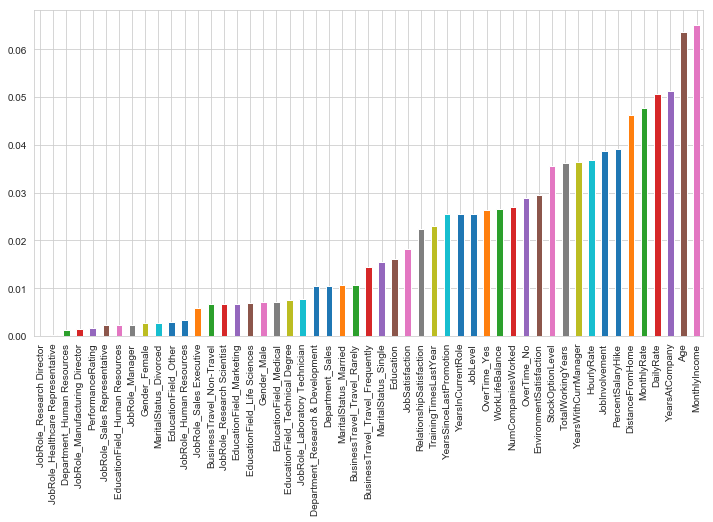

In [48]:
pd.Series(rf_clf.feature_importances_,
          index=X_train.columns).sort_values(ascending=True).plot(kind='bar', figsize=(12,6))

***
## AdaBoost

In [49]:
from sklearn.ensemble import AdaBoostClassifier

In [50]:
ada_clf = AdaBoostClassifier()

In [51]:
ada_clf.fit(X_train, y_train.ravel())

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [55]:
print_score(ada_clf, X_train, y_train.ravel(), X_test, y_test.ravel(), train=True)

Train Results:

Accuracy Score: 0.9047

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.98      0.95       923
           1       0.84      0.51      0.63       179

   micro avg       0.90      0.90      0.90      1102
   macro avg       0.88      0.74      0.79      1102
weighted avg       0.90      0.90      0.89      1102
 

Confusion Matrix: 
 [[906  17]
 [ 88  91]] 

Average Accuracy: 	 0.8649
Accuracy SD: 		 0.0294


In [56]:
print_score(ada_clf, X_train, y_train, X_test, y_test, train=False)

Test Results:

Accuracy Score: 0.8804

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.96      0.93       310
           1       0.68      0.47      0.55        58

   micro avg       0.88      0.88      0.88       368
   macro avg       0.79      0.71      0.74       368
weighted avg       0.87      0.88      0.87       368
 

Confusion Matrix: 
 [[297  13]
 [ 31  27]] 



***

## AdaBoost + RandomForest

In [57]:
ada_clf = AdaBoostClassifier(RandomForestClassifier())
ada_clf.fit(X_train, y_train.ravel())

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          learning_rate=1.0, n_estimators=50, random_state=None)

In [58]:
print_score(ada_clf, X_train, y_train.ravel(), X_test, y_test.ravel(), train=True)

Train Results:

Accuracy Score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       923
           1       1.00      1.00      1.00       179

   micro avg       1.00      1.00      1.00      1102
   macro avg       1.00      1.00      1.00      1102
weighted avg       1.00      1.00      1.00      1102
 

Confusion Matrix: 
 [[923   0]
 [  0 179]] 

Average Accuracy: 	 0.8549
Accuracy SD: 		 0.0147


In [59]:
print_score(ada_clf, X_train, y_train.ravel(), X_test, y_test.ravel(), train=False)

Test Results:

Accuracy Score: 0.8641

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.99      0.92       310
           1       0.83      0.17      0.29        58

   micro avg       0.86      0.86      0.86       368
   macro avg       0.85      0.58      0.61       368
weighted avg       0.86      0.86      0.82       368
 

Confusion Matrix: 
 [[308   2]
 [ 48  10]] 



***

## Gradient Boosting Classifier

In [60]:
from sklearn.ensemble import GradientBoostingClassifier

In [61]:
gbc_clf = GradientBoostingClassifier()

In [62]:
gbc_clf.fit(X_train, y_train.ravel())

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [63]:
print_score(gbc_clf, X_train, y_train.ravel(), X_test, y_test.ravel(), train=True)

Train Results:

Accuracy Score: 0.9583

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.98       923
           1       0.99      0.75      0.85       179

   micro avg       0.96      0.96      0.96      1102
   macro avg       0.97      0.88      0.92      1102
weighted avg       0.96      0.96      0.96      1102
 

Confusion Matrix: 
 [[921   2]
 [ 44 135]] 

Average Accuracy: 	 0.8585
Accuracy SD: 		 0.0262


In [64]:
print_score(gbc_clf, X_train, y_train.ravel(), X_test, y_test.ravel(), train=False)

Test Results:

Accuracy Score: 0.8723

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       310
           1       0.70      0.33      0.45        58

   micro avg       0.87      0.87      0.87       368
   macro avg       0.79      0.65      0.69       368
weighted avg       0.86      0.87      0.85       368
 

Confusion Matrix: 
 [[302   8]
 [ 39  19]] 



***

## XGBoost

In [65]:
import xgboost as xgb

In [67]:
xgb_clf = xgb.XGBClassifier()

In [68]:
xgb_clf.fit(X_train, y_train.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [69]:
print_score(xgb_clf, X_train, y_train.ravel(), X_test, y_test.ravel(), train=True)

Train Results:

Accuracy Score: 0.9401

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       923
           1       0.97      0.65      0.78       179

   micro avg       0.94      0.94      0.94      1102
   macro avg       0.96      0.82      0.87      1102
weighted avg       0.94      0.94      0.94      1102
 

Confusion Matrix: 
 [[920   3]
 [ 63 116]] 

Average Accuracy: 	 0.8676
Accuracy SD: 		 0.0274


In [70]:
print_score(xgb_clf, X_train, y_train.ravel(), X_test, y_test.ravel(), train=False)

Test Results:

Accuracy Score: 0.8859

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.99      0.94       310
           1       0.83      0.34      0.49        58

   micro avg       0.89      0.89      0.89       368
   macro avg       0.86      0.67      0.71       368
weighted avg       0.88      0.89      0.87       368
 

Confusion Matrix: 
 [[306   4]
 [ 38  20]] 



***

## Grid Search

In [71]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [72]:
gbc_clf = GradientBoostingClassifier(random_state=42)

In [73]:
params_grid = {"max_depth": [3, None],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10]}

In [74]:
grid_search = GridSearchCV(gbc_clf, params_grid,
                          n_jobs=-1, cv=5,
                          verbose=1, scoring="accuracy")

In [75]:
grid_search.fit(X_train, y_train.ravel())

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   43.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [3, None], 'min_samples_split': [2, 3, 10], 'min_samples_leaf': [1, 3, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [76]:
grid_search.best_score_

0.8620689655172413

In [77]:
grid_search.best_estimator_.get_params()

{'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'auto',
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [78]:
print_score(grid_search, X_train, y_train, X_test, y_test, train=True)

Train Results:

Accuracy Score: 0.9555

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       923
           1       0.98      0.74      0.84       179

   micro avg       0.96      0.96      0.96      1102
   macro avg       0.97      0.87      0.91      1102
weighted avg       0.96      0.96      0.95      1102
 

Confusion Matrix: 
 [[920   3]
 [ 46 133]] 

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   33.0s finished
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   32.2s finished
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   30.9s finished
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   32.8s finished
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   34.4s finished
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   34.6s finished
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   29.0s finished
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   30.9s finished
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   28.2s finished
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   31.8s finished
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Average Accuracy: 	 0.8549
Accuracy SD: 		 0.0273


In [79]:
print_score(grid_search, X_train, y_train, X_test, y_test, train=False)

Test Results:

Accuracy Score: 0.8804

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.99      0.93       310
           1       0.82      0.31      0.45        58

   micro avg       0.88      0.88      0.88       368
   macro avg       0.85      0.65      0.69       368
weighted avg       0.87      0.88      0.86       368
 

Confusion Matrix: 
 [[306   4]
 [ 40  18]] 



***

In [80]:
xgb_clf = xgb.XGBClassifier(max_depth=3, n_estimators=10000, learning_rate=0.2)

In [81]:
xgb_clf.fit(X_train, y_train.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [82]:
print_score(xgb_clf, X_train, y_train.ravel(), X_test, y_test.ravel(), train=True)

Train Results:

Accuracy Score: 0.9401

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       923
           1       0.97      0.65      0.78       179

   micro avg       0.94      0.94      0.94      1102
   macro avg       0.96      0.82      0.87      1102
weighted avg       0.94      0.94      0.94      1102
 

Confusion Matrix: 
 [[920   3]
 [ 63 116]] 

Average Accuracy: 	 0.8676
Accuracy SD: 		 0.0274


In [83]:
print_score(xgb_clf, X_train, y_train.ravel(), X_test, y_test.ravel(), train=False)

Test Results:

Accuracy Score: 0.8859

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.99      0.94       310
           1       0.83      0.34      0.49        58

   micro avg       0.89      0.89      0.89       368
   macro avg       0.86      0.67      0.71       368
weighted avg       0.88      0.89      0.87       368
 

Confusion Matrix: 
 [[306   4]
 [ 38  20]] 

